# A Practical Assignment: SME Borrowing History
#### Rajat Choudhary

## Purpose of this assingment

In this assingment we aim to :    
* Examine a small business’s (SME) borrowing history and understand any underlying trends by exploration and visualisation
* Building a predicitve model to forecast the total debts from all lenders over time

## Before we begin
Before we start our analysis we will import some of the standard libraries that are frequently used. We will also set the random seed so that the same random numbers are chosen. We set this as 24 (choice)

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(24)

## Part 1 Statistical Analysis 

#### Part 1.1 Loading the dataset
We will load the dataset using Pandas. This will be our main data to work with and all the alterations will be made in this. For this reason, we will also maintain a copy  if we ever want to refer to the original dataset `smedebtsu.xlsx`

In [3]:
data = pd.read_excel("smedebtsu.xlsx")
data.head()

# Maintain a copy we want to wanna refer to original later 
data_original = data.copy()
data.head()

,Date,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
0,2013-10-13 00:00:00,13,10,2013,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00
1,2013-11-13 00:00:00,13,11,2013,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09
2,2013-12-10 00:00:00,10,12,2013,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00
3,2014-01-23 00:00:00,23,1,2014,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00
4,2014-03-05 00:00:00,5,3,2014,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00


#### Part 1.2 Basic stats
We can use Panda's `describe` function to extract some useful statistics

In [4]:
data.describe()

,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,13.614035,7.096491,2017.605263,38755.816579,66840.291930,1406.541053,971.956140,185799.648158,40254.729649,21544.682018,42589.622456,8460.370175,40982.072807,18831.246404
std,8.636728,3.672354,3.012124,41698.925450,46056.428855,3637.700561,1896.312866,93078.720974,56996.382488,22273.512355,39507.882437,8369.124958,52769.068725,17520.902350
min,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,4.000000,2015.000000,0.000000,22000.000000,0.000000,0.000000,108655.250000,0.000000,2455.750000,0.000000,104.500000,0.000000,0.000000
50%,12.500000,8.000000,2017.000000,31707.500000,76131.000000,0.000000,0.000000,210353.000000,0.000000,10450.000000,46695.000000,6176.500000,0.000000,15400.000000
75%,20.750000,10.000000,2020.000000,60709.000000,106909.000000,0.000000,783.750000,252254.750000,76238.250000,45911.250000,79585.000000,14542.000000,104115.000000,33041.250000
max,31.000000,12.000000,2023.000000,138754.000000,146476.000000,14300.000000,7986.000000,352099.000000,176000.000000,70059.000000,121033.000000,29700.000000,143000.000000,53350.000000


From the table above, we can observe a few things: 
* Range of the data is from the year 2013 to year 2023.
* They have borrowed and stopped from every lender at some point of time as min of every lender is 0 and max is not.

#### Part 1.3 Checking for Dtypes
As the SME team uses manual methods to enter data into the Excel sheet, it can cause some data entry errors which can mess up the column data. Hence we will look for manual errors check the data type of different columns. This can be achieved by Panda's `dtypes` function. We expect the following : 
1. Date is in datetime format
2. Day Month and Year are integers
3. Lender amount information is in either float or int format 

In [5]:
data.dtypes

Date        object
Day          int64
Month        int64
Year         int64
LenderA    float64
LenderB    float64
LenderC    float64
LenderD      int64
LenderE    float64
LenderF    float64
LenderG    float64
LenderH    float64
LenderI    float64
LenderJ    float64
LenderK    float64
dtype: object

All results are as expected but date is not in correct format. Referring to the original excel sheet, we see that 3 dates were missing a '/' and hence were not detected as datetime. To solve this, we make use of the correctly stored columns : Date, Month and Year to create a new datetime column. After this, the old redudant date is dropped.

After this we also sort our dataset by the new datetime column. This acheive two things: 
1. Data is easier to look and identify any trends. 
2. We can detect duplicated values.

In [6]:
# Using Year, Day, and Month to create date
data.insert(0,'Datetime','')
data['Datetime'] = pd.to_datetime(data['Year'].astype(str) + '/' + data['Month'].astype(str) + '/' + data['Day'].astype(str))

# Dropping Redudant Date 
data.drop(columns = 'Date', inplace = True)

# Sort by date
data.sort_values(by=["Datetime"], inplace = True, ignore_index=True)
display(data)

,Datetime,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
0,2013-10-13,13,10,2013,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.00,0.00,2442.00,0.0,2981.00
1,2013-11-13,13,11,2013,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.00,0.00,2422.09,0.0,6844.09
2,2013-12-10,10,12,2013,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.00,0.00,2640.00,0.0,7150.00
3,2014-01-23,23,1,2014,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.00,0.00,0.00,0.0,0.00
4,2014-03-05,5,3,2014,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-11-28,28,11,2022,28369.0,115775.00,0.00,0,245740.0,22638.00,62084.00,104335.00,14025.00,19800.0,0.00
110,2023-02-05,5,2,2023,26774.0,108064.00,0.00,0,234740.0,15125.00,57772.00,98703.00,8800.00,15400.0,0.00
111,2023-03-05,5,3,2023,26202.0,104225.00,0.00,0,231077.0,11352.00,56826.00,95810.00,5500.00,13200.0,0.00
112,2023-04-05,5,4,2023,25432.0,100375.00,0.00,0,227403.0,7579.00,54618.08,92689.96,0.00,11000.0,0.00


####  Part 1.4 Checking for Duplicates 


In [7]:
data[data.duplicated(keep= False)]

,Datetime,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
8,2014-07-07,7,7,2014,0.0,44000.0,880.0,0,236643.0,0.00,5500.0,0.0,550.0,0.0,0.0
9,2014-07-07,7,7,2014,0.0,44000.0,880.0,0,236643.0,0.00,5500.0,0.0,550.0,0.0,0.0
10,2014-07-07,7,7,2014,0.0,44000.0,880.0,0,236643.0,0.00,5500.0,0.0,550.0,0.0,0.0
11,2014-08-12,12,8,2014,0.0,42207.0,3300.0,4499,232265.0,0.00,10450.0,0.0,0.0,0.0,19800.0
12,2014-08-12,12,8,2014,0.0,42207.0,3300.0,4499,232265.0,0.00,10450.0,0.0,0.0,0.0,19800.0
13,2014-08-12,12,8,2014,0.0,42207.0,3300.0,4499,232265.0,0.00,10450.0,0.0,0.0,0.0,19800.0
14,2014-09-13,13,9,2014,0.0,32835.0,6237.0,0,227876.0,0.00,1947.0,0.0,0.0,0.0,15400.0
15,2014-09-13,13,9,2014,0.0,32835.0,6237.0,0,227876.0,0.00,1947.0,0.0,0.0,0.0,15400.0
16,2014-09-13,13,9,2014,0.0,32835.0,6237.0,0,227876.0,0.00,1947.0,0.0,0.0,0.0,15400.0
17,2014-10-13,13,10,2014,0.0,22000.0,0.0,0,223498.0,0.00,1980.0,0.0,2200.0,0.0,22000.0


These are all the duplicated rows. To see how many rows are duplicated, we can use check below. 
Note : It will count every occurance of the duplicated row except for the first.

In [8]:
data[data.duplicated()].shape[0]

30

We will drop all these rows and should be left with 84 instances

In [9]:
data.drop_duplicates(inplace=True)
# Reset Index
data.reset_index(drop = True, inplace = True)

In [10]:
data

,Datetime,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK
0,2013-10-13,13,10,2013,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.00,0.00,2442.00,0.0,2981.00
1,2013-11-13,13,11,2013,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.00,0.00,2422.09,0.0,6844.09
2,2013-12-10,10,12,2013,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.00,0.00,2640.00,0.0,7150.00
3,2014-01-23,23,1,2014,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.00,0.00,0.00,0.0,0.00
4,2014-03-05,5,3,2014,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2022-11-28,28,11,2022,28369.0,115775.00,0.00,0,245740.0,22638.00,62084.00,104335.00,14025.00,19800.0,0.00
80,2023-02-05,5,2,2023,26774.0,108064.00,0.00,0,234740.0,15125.00,57772.00,98703.00,8800.00,15400.0,0.00
81,2023-03-05,5,3,2023,26202.0,104225.00,0.00,0,231077.0,11352.00,56826.00,95810.00,5500.00,13200.0,0.00
82,2023-04-05,5,4,2023,25432.0,100375.00,0.00,0,227403.0,7579.00,54618.08,92689.96,0.00,11000.0,0.00


####  Part 1.4 Checking for Missing Values 

In [11]:
# Any nulls
print("Any null:", data.isnull().values.any())

Any null: False


####  Part 1.5 Initial Statistical Tests : ADF and KPSS

As our dataset is really small (only 84 instances, we would have to relay on both : Statistical tests and visualisation to analyze any trends ) We will run some statistical tests and try to analyze the time series data any trends. The purpose is that if there are any such patterns, we need to keep them in mind whilst buidling our model. To analyze this we conduct Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test using `statsmodels.tsa.stattools` library. 

For ADF : The null hypothesis of the ADF is that there is a unit root (i.e., it is non-stationary). Hence, if the p-value is above than 0.05 it hints that the time series is non stationary. 

For KPSS: The null hypothesis of the KPSS test is that the time series is stationary (i.e., it has no trend). Hence, if the p-above than 0.05, it hints that the time-series is stationary.

"A stationary time-series is defined as a time-series whose properties do not depend on the time at which the series is observed. Thus, time-series with trends, or with seasonality, are not stationary whereas white noise series are stationary". Refrence : https://f0nzie.github.io/hyndman-bookdown-rsuite/stationarity-and-differencing.html

Note : We are not analysing seasonality here as it is much easier to detect in a visual examination. 


Before this we need a column in our dataset that gives us total debts from all lenders. This is formed by adding the debts from all lenders in a row. 

In [12]:
data["Total Debts"] = data.loc[:,'LenderA':].sum(axis = 1)

In [13]:
data.head(5)

,Datetime,Day,Month,Year,LenderA,LenderB,LenderC,LenderD,LenderE,LenderF,LenderG,LenderH,LenderI,LenderJ,LenderK,Total Debts
0,2013-10-13,13,10,2013,74349.0,70109.93,11477.84,4884,0.0,61763.24,0.0,0.0,2442.00,0.0,2981.00,228007.01
1,2013-11-13,13,11,2013,73535.0,66083.05,9607.84,5170,0.0,61763.24,2563.0,0.0,2422.09,0.0,6844.09,227988.31
2,2013-12-10,10,12,2013,71027.0,93500.00,14300.00,4950,0.0,59400.00,12232.0,0.0,2640.00,0.0,7150.00,265199.00
3,2014-01-23,23,1,2014,0.0,15741.00,14300.00,3300,262944.0,0.00,3168.0,0.0,0.00,0.0,0.00,299453.00
4,2014-03-05,5,3,2014,0.0,14850.00,13200.00,3476,254177.0,0.00,4400.0,0.0,0.00,0.0,0.00,290103.00


In [14]:
# We conduct the ADF test and display results accordingly
import statsmodels.tsa.stattools as ts

output = ts.adfuller(data["Total Debts"])
print("Results of ADF Test")
adf_results = pd.Series(
        output[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Lags Used",
            "Number of Observations Used",
        ],
    )

# Run a loop to display what last 4 values mean
for key, value in output[4].items():
        adf_results["Critical Value (%s)" % key] = value
print(adf_results)

Results of ADF Test
Test Statistic                 -1.892313
p-value                         0.335686
Lags Used                       0.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


Note : Although the lenght of our dataset is 84. ADF only uses 83 values for observation. This is due to the inclusion of lagged values. 

In [15]:
output_kpss = ts.kpss(data["Total Debts"])
print("Results of KPSS Test:")
kpss_results = pd.Series(
        output_kpss[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
for key, value in output_kpss[3].items():
    kpss_results["Critical Value (%s)" % key] = value
print(kpss_results)

Results of KPSS Test:
Test Statistic           1.29231
p-value                  0.01000
Lags Used                5.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_30516\2317737088.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  output_kpss = ts.kpss(data["Total Debts"])


We see that our tests ADF and KPSS both point the same thing and it appears that our time series data is more likely to be non-stationary. However, this is just a start and we would need to visualize our data further.

####  Part 1.6 Checking Cyclicity

We use Cycle Detection in Time Series (CyDeTS). It is an algorithim to detect cycles in times series along with their respective depth of cycle and duration. This would give us some additional context to see if there are any cycles in our data


In [16]:
from cydets.algorithm import detect_cycles

cycles = detect_cycles(data["Total Debts"])

# Rename columns to see what they mean
cycles= cycles.rename(columns={"t_start" :'Cycle Start', "t_end": "Cycle End", "t_minimum" : "Minimum value of x", "doc" : "depth of cycle"})
display(cycles)

,Cycle Start,Cycle End,Minimum value of x,depth of cycle,duration
0,0,62,1,0.000034,62
1,3,5,4,0.017205,2
2,5,7,6,0.019715,2
3,7,9,8,0.036818,2
4,9,14,11,0.075155,5
5,12,14,13,0.018278,2
6,14,19,16,0.051876,5
7,19,25,20,0.125888,6
8,22,25,23,0.003516,3
9,25,29,27,0.007451,4


This suggests that there is some cyclicity in our dataset

## Part 2 Visual Analysis
After looking at the statistics, we want to draw some graphs for a better understanding of our data and the underlying trends, seasonality and cyclicity. 

####  Part 2.1 Average debts over years 

In this we will draw a box plot. A box and whisker plot:
* Essentially divides the data in 4 quarters
* Gives an idea where most of our data sits
* Tells us the spread of our data 

Before this we need a column in our dataset that gives us total debts from all lenders. This is formed by adding the debts from all lenders in a row. 

We will make use of `seaborn` and `matplotlib` two of the very popular libraries to draw this plot. Additionally we also use different styling for figure, axes, markers and font to increase aesthetics and appealing to non-technical audiences. 

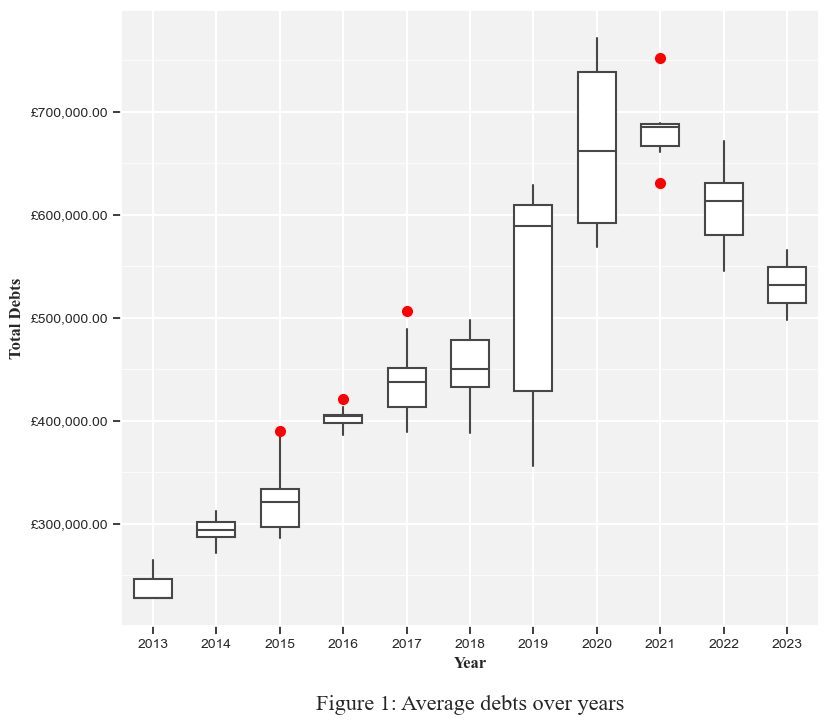

In [37]:
# Importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set figure and subplots for grids (both Major and minor)
fig, ax = plt.subplots(1, 1)

# Styling for background and figure size
sns.set(rc={'figure.figsize': (9, 8), 'axes.facecolor': '#F2F2F2', 'xtick.bottom': True, 'ytick.left': True})

# Marker styling 
flier_props = dict(markerfacecolor='red', marker='o', markeredgecolor='none',  markersize= 8)

# Draw and Style the boxplot i.e. style the flier, box, disable the unpper extreme and lower extreme line and adjust the width 
sns.boxplot(x='Year', y='Total Debts', data=data, flierprops=flier_props, boxprops=dict(facecolor='white'), showcaps=False, width=0.6)

# Set the minor grid lines on the y axis and as we don't want ticks on Y axis, we will remove them. 
ax.get_yaxis().set_minor_locator(mpl.ticker.FixedLocator([250000,350000, 450000,550000, 650000, 750000]))
ax.grid(visible=True, which='minor', color='w', linewidth=0.5)
ax.tick_params(which='minor', length=0, color='r')

# Adjust the major grid lines (both x and y) to have a bigger width and be differentiable from minor. 
ax.grid(visible=True, which='major', color='w', linewidth=1.5)

# Reduce x and y tick sizes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Format y-axis labels to display a pound sign and comma separator and upto 2 decimal places
formatter = mpl.ticker.StrMethodFormatter('£{x:,.2f}')
ax.yaxis.set_major_formatter(formatter)

# Make Y axis labels as bold labels and choose the appropriarte font. 
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold', 'fontfamily' : "Times New Roman"})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold','fontfamily' : "Times New Roman"})

# Add title to the graph and show 
plt.title('Figure 1: Average debts over years', y= -0.15, fontsize = 16, fontfamily = "Times New Roman")
plt.show()

Main results : 
* Annual average debt was increasing for the years 2013 - 2020 and started to decrease from 2020 to 2023, however from final value is still higher than initial.
* From 2013 - 2018 the increase was slow but uniform, not much spread out and had very less anamolies
* The data is most spread out in year 2019 as the debt increased from ~350,000 pounds to ~625,000 pounds and continued to increase further in 2020. Maybe this was linked to some market crash or economic crisis? Some Irregularity in those years?
* The debt was maximum in 2020 with the median being a little over 500,000 pounds.There were no anamoly months in that year
* After 2020 to 2023, the overall debt started to decrease, but was still higher than 2018's maximum i.e. 500,000 pounds



Overall the graph shows a general upward trend, indicated by a rise from the initial point to the final point. This conclusion supports the previously obtained statistical results. However, this is a very low amount of data to say anything for sure.  Possibly, if we had a much longer series, we could see that this might actually part of a long cycle, but when viewed over only this dataset, there seems to be some long term increasing trend.

####  Part 2.2 Total debts from all lenders over months and years

We create a line graph to see how the debt is distributed in different months of a year. This will help us to track any seasonilty or cylces in a year. 

To do this we use the same libraries. Group the data by year and make subplots for every group. Also, we do some styling.    

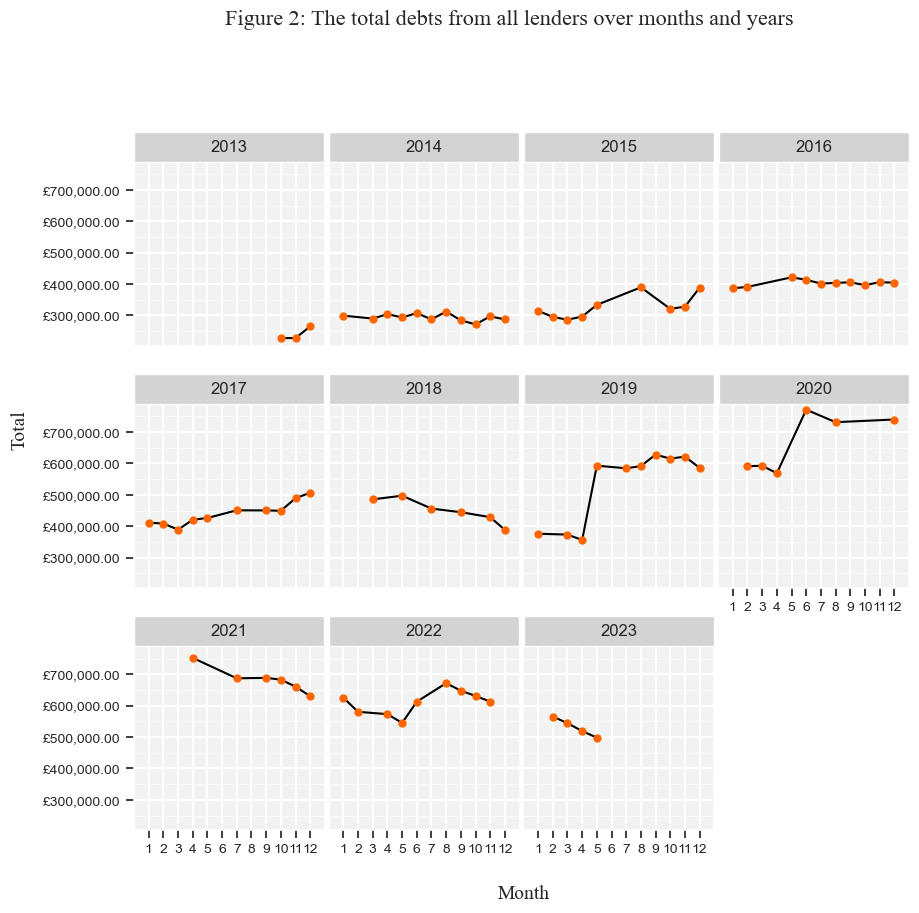

In [18]:
# Group the dataset by year to display the lender debt in 12 months of an year
grouped = data.groupby('Year')

# Numnber of subplots in a row, i.e. number of columns
num_cols = 4

# Determining the numnber of rows : Number of rows that contain all 4 subplots, and the leftover rows, i.e. take the quoteint and remainder of len(grouped)/num_cols
num_rows = len(grouped) // num_cols + len(grouped) % num_cols

# Create subplots using the mentioned num of rows and cols
fig, axes = plt.subplots(nrows= num_rows, ncols= num_cols, figsize=(10, 15))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Get common y-axis range and adjust for display purposes (values finalized by trail and test)
y_min = data['Total Debts'].min()  - 25000
y_max = data['Total Debts'].max() + 25000

# Iterate over groups to display each plot
for i, (year, group) in enumerate(grouped):
    
    # Plot line plot for each group
    #Get ith axes and draw a line plot, tweak the marker and line color settings for appropriate display      
    ax = axes[i]
    ax.plot(group['Month'], group['Total Debts'], color='black', marker='o', markerfacecolor='#FF6600', markeredgewidth=0, markersize= 6)
    
    # Set title for each axes    
    title = ax.set_title(f'{year}', bbox={'facecolor': 'lightgray', 'edgecolor': 'white'})
    
    # Adjust the title settings to make the width of the title box span the entire plot     
    title._bbox_patch._mutation_aspect = 0.1
    title.get_bbox_patch().set_boxstyle("square", pad= 4.59)
    
    #Set y and x axis range
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(0, 13)   
    ax.set_xticks(range(1, 13))  # Seting x-axis ticks from 1 to 12
    ax.set_xticklabels(range(1, 13))  # Seting x-axis tick labels from 1 to 12
    
     # Reduce x tick sizes
    ax.tick_params(axis='x', labelsize=10)
    
    # If we graph is first in a row, we want yticks. This optimises display. To check this we see if index is divisble by 4 as there are 4 columns in a row 
    if i % 4 == 0:
        # Set y-tick label size for the first plot in the row
        ax.yaxis.set_tick_params(labelsize=10)
        
        # Format y-axis labels with pound sign and comma separator and upto 2 decimal places
        formatter = mpl.ticker.StrMethodFormatter('£{x:,.2f}')
        ax.yaxis.set_major_formatter(formatter)
        
    else:
        # Hide y-axis labels for other plots in the row
        ax.tick_params(axis='y', labelleft=False)  
        ax.yaxis.set_ticks_position('none')
    
    # We want x ticks for only last 4 graphs 
    if i < 7:
        # Remove x tick labels and set the set the tick positions to none for these subplots
        ax.set_xticklabels([])  
        ax.xaxis.set_ticks_position('none')
    
    # Set the minor grid lines on the y axis and as we don't want ticks on Y axis, we will remove them. 
    ax.get_yaxis().set_minor_locator(mpl.ticker.FixedLocator([250000,350000, 450000,550000, 650000, 750000]))
    ax.grid(visible=True, which='major', color='w', linewidth=1.5)
    ax.grid(visible=True, which='minor', color='w', linewidth=0.5)
    ax.tick_params(which='minor', length=0)
    
    # Labels formatting
    ax.set_xlabel(ax.get_xlabel(), fontdict={'fontfamily' : "Times New Roman"})
    ax.set_ylabel(ax.get_ylabel(), fontdict={'fontfamily' : "Times New Roman"})
    
    
# Check if there are unused subplots and remove them by iterating over the length of group and axes
if len(grouped) < len(axes):
    for i in range(len(grouped), len(axes)):
        fig.delaxes(axes[i])

    
# Adjust spacing between subplots
fig.subplots_adjust(hspace = 0.3)
fig.subplots_adjust(wspace = 0.02)

# Display the labels for y and x axis for the overall figure. 
plt.text(0.01, 0.0, 'Month', ha='center', va='center', fontsize=14, fontfamily="Times New Roman")
fig.text(0.01, 0.7, 'Total', ha='center', va='center', rotation='vertical', fontsize=14, fontfamily="Times New Roman")

# Set title for overall figure and show

plt.suptitle('Figure 2: The total debts from all lenders over months and years',fontsize=16, fontfamily="Times New Roman")
plt.show()

Main results : 
* There is no promiment seasonality (data rising and falling in fixed frequencies) that repeats in some months every year
* In May 2019, there is a sudden rise in debt (from ~ 350,000 to ~600,000) and , following that lingers in the same region for the following months in that year. This might be some special scenario such as some economic crisis ? 
* There is again a sudden rise but not that drastic in June 2020 where the debt rose from 550,000 to 750,000. Again something happened? 

Overall we can certainly say that although there is no seasonality there might be some cyclicity in this dataset. Also, there was likely an economic crisis that happened in May 2019 and June 2020 which accounted for these sudden rise and fall in debts.

####  Part 2.3 Total monthly debts from all lenders over months starting from October 2013 
We plot a line graph of total debts vs months starting from october 2013. This is give us a picture of any underlying patterns that may be present in our data

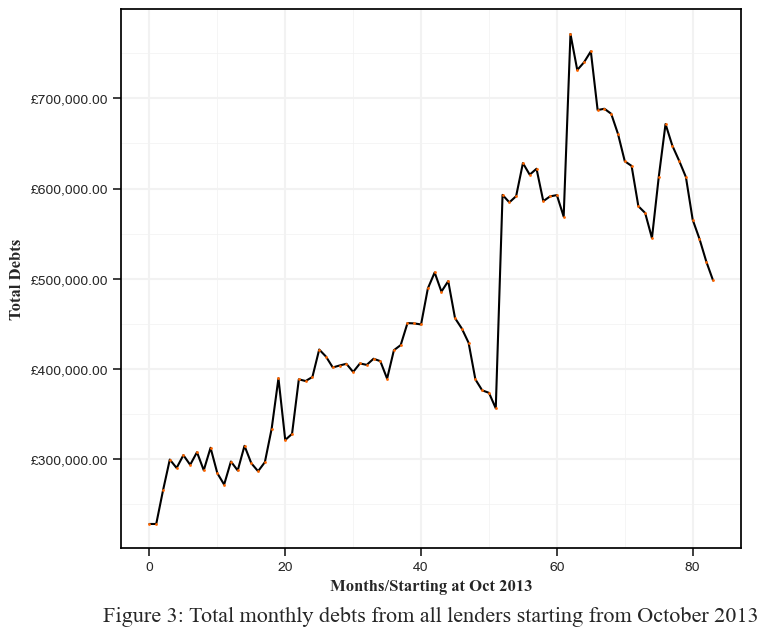

In [39]:
# Set figure and subplots for grids (both Major and minor)
fig, ax = plt.subplots(1, 1)

# Styling for background and figure size
sns.set(rc={'figure.figsize': (8, 7), 'axes.facecolor': 'white', 'xtick.bottom': True, 'ytick.left': True, 'axes.edgecolor': 'black'})
sns.lineplot(data=data, x=data.index, y="Total Debts",color = 'black', marker='o', markeredgewidth=0, markerfacecolor='#FF6600', markersize= 2)

# Set the minor grid lines on the y axis
ax.get_yaxis().set_minor_locator(mpl.ticker.FixedLocator([250000,350000, 450000,550000, 650000, 750000]))
ax.get_xaxis().set_minor_locator(mpl.ticker.FixedLocator([10,30,50,70]))

ax.grid(visible=True, which='minor', color='#F2F2F2', linewidth=0.5)

# Adjust the major grid lines (both x and y) to have a bigger width and be differentiable from minor. 
ax.grid(visible=True, which='major', color='#F2F2F2', linewidth=1.5)

# Reduce x and y tick sizes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Format y-axis labels to display a pound sign and comma separator and upto 2 decimal places
formatter = mpl.ticker.StrMethodFormatter('£{x:,.2f}')
ax.yaxis.set_major_formatter(formatter)

# Make Y axis labels as bold labels and choose the appropriarte font. 
ax.set_xlabel('Months/Starting at Oct 2013', fontdict={'weight': 'bold', 'fontfamily' : "Times New Roman"})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold','fontfamily' : "Times New Roman"})


ax.tick_params(which='minor', length= 0)

plt.title('Figure 3: Total monthly debts from all lenders starting from October 2013', y= -0.15, fontsize = 16, fontfamily = "Times New Roman")
plt.show()

Overall from all these tests, we can detect that there isn't any seasonality but there is some trend and cyclicity in our dataset. We will keep this in mind whilst buliding our model. 

## Part 3 Predicitve Modeling

After the analysis of our data we have 3 main important things to whilst thinking of building a model: 

1. Our model should work well with limited instances
2. Our model could exempt seasonality but must capture some trend and cyclicity
3. Data is univariate : Total Debt is just affected by the month of the year. For all lenders it is just the sum, maybe due to month there is a higher intreset rate, etc. 

After reviewing our conditions, we choose to apply two approaches and compare them. <br> 
    A. The first approach is to do a time series analysis using the relevant forecasting models. <br> 
    B. Translate the time series analysis as a supervised machine learning problem. To achieve this we pass month since our start date as one of the features, for second feature we do a bit of feature engineering. This is done to include our data analysis intelligence and capture the two special dates of economic crisis potentially, i.e. "May 2019" and "June 2020"

####  Part 3.1 Choosing the model

For forecasting models we choose Exponential Smootheing and Prophet. Exponential smoothings methods are appropriate for non-stationary data and other methods such as ARIMA or Seasonal Arima (SARIMA) when the data is stationary data. Prophet is one of the best performing algorithims for univariate time series data. It was released by Facebook's core data science team. Although it works best with seasonal data, it is still one of the best algorithims for caputring the underlying trend and cyclicty, even without seasonality. <br>

For Machine Learning models we choose to apply ridge regression since it handles overfitting exceptionally well, making it one of the best choices for small datasets when compared to other algorithims. This choice is also compared and proven with other algorithims such as Random Forest, SVR, etc. through trial and error, which are not present here due to time constraints.

####  Part 3.3 Choosing Evaluation Metrics

Since our dataset is in the ranges of 1e6, choosing absolute error gives big scale errors that are very hard to interpret. Hence, we choose the percentage metric Mean Percentage error (MAPE), this will make the error values closer to 0.

####  Part 3.2 Model 1: Exponential Smootheing

This is a forecasting model where we will forecast the upcoming days. Some things to note: 
1. Due to our data constraints, we just split our dataset in train and test in the ratio of 80:20, and don't keep validation data aside for any hyperparameter tuning. For splitting we can't split randomly as it is a forecasting model that predicts the next 30 rows, rather than by index.
2. Only need total debts series from the data

In [20]:
# Choosing the data
es_data = data["Total Debts"]

In [21]:
# Splitting train and test

percent_80 = int(0.80*len(es_data))
train_data_es = es_data[:percent_80]
test_data_es = es_data[percent_80:]

print("Length of Trainset: ", len(train_data_es))
print("Length of Testset: ", len(test_data_es))

Length of Trainset:  67
Length of Testset:  17


#####  Part 3.2.1 Model Building 
This is a rather straight forward forecasting model. We use our data analysis results and set some trend value 

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Build the model, smoothing decided by trail and test and set seasonal as none.  
es_model = ExponentialSmoothing(train_data_es, trend='additive', seasonal= None).fit(smoothing_level = 0.9)

# Save the train and test predictions
train_predictions_es = es_model.predict(start = 0, end = percent_80-1)
test_predictions_es = es_model.predict(start = percent_80, end = 83)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Smoothing level 0.9 tells the algorithim to weight the present value more than the past values

#####  Part 3.2.2 Model Evaluation and Visualisation

In [23]:
from sklearn.metrics import mean_absolute_percentage_error

train_mape_es = mean_absolute_percentage_error(train_data_es, train_predictions_es)
test_mape_es = mean_absolute_percentage_error(test_data_es, test_predictions_es)

print("Train MAPE ES: ", round(train_mape_es,3))
print("Test MAPE ES: ", round(test_mape_es,3))

Train MAPE ES:  0.057
Test MAPE ES:  0.261


This suggests a resonable forecast since the MAPE error is between ~20% - ~50% .Generally, For mape values lower than 10 it is considered as a great fit and for less than 50% it is considered as a worse fit. 

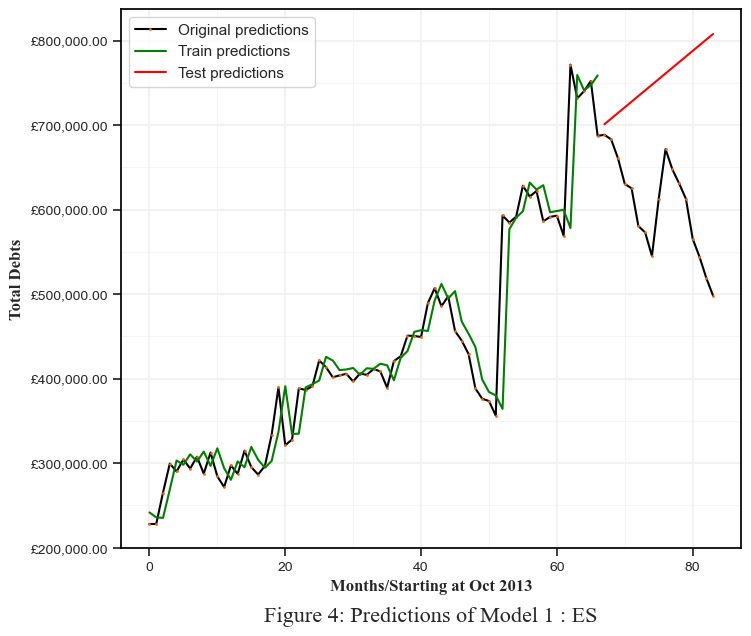

In [24]:
# Set figure and subplots for grids (both Major and minor)
fig, ax = plt.subplots(1, 1)

# Styling for background and figure size
sns.set(rc={'figure.figsize': (8, 7), 'axes.facecolor': 'white', 'xtick.bottom': True, 'ytick.left': True, 'axes.edgecolor': 'black'})

sns.lineplot(data=data, x=data.index, y="Total Debts",color = 'black', marker='o', markeredgewidth=0, markerfacecolor='#FF6600', markersize= 2, label = "Original predictions")
sns.lineplot(data=train_predictions_es, x=range(0,percent_80), y = train_predictions_es,color = 'green', label =  "Train predictions")
sns.lineplot(data=test_predictions_es, x=range(percent_80,84), y = test_predictions_es,color = 'red', label =  "Test predictions")


# Set the minor grid lines on the y axis
ax.get_yaxis().set_minor_locator(mpl.ticker.FixedLocator([250000,350000, 450000,550000, 650000, 750000]))
ax.get_xaxis().set_minor_locator(mpl.ticker.FixedLocator([10,30,50,70]))

ax.grid(visible=True, which='minor', color='#F2F2F2', linewidth=0.5)

# Adjust the major grid lines (both x and y) to have a bigger width and be differentiable from minor. 
ax.grid(visible=True, which='major', color='#F2F2F2', linewidth=1.5)

# Reduce x and y tick sizes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Format y-axis labels to display a pound sign and comma separator and upto 2 decimal places
formatter = mpl.ticker.StrMethodFormatter('£{x:,.2f}')
ax.yaxis.set_major_formatter(formatter)

# Make Y axis labels as bold labels and choose the appropriarte font. 
ax.set_xlabel('Months/Starting at Oct 2013', fontdict={'weight': 'bold', 'fontfamily' : "Times New Roman"})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold','fontfamily' : "Times New Roman"})


ax.tick_params(which='minor', length= 0)
ax.legend()

plt.title('Figure 4: Predictions of Model 1 : ES', y= -0.15, fontsize = 16, fontfamily = "Times New Roman")
plt.show()

These overall results show that our model has low bias but high variance as it fits the training data well but fails in terms of test data. We confirm this by both the evaluation metrics and the graph. Hence, this model does present a resonable forecasting and might be really useful if we had more data.

####  Part 3.3 Model 2:Prophet

Whilst it is very easy to implement without any cross validation neccasary to prevent overfitting, the dataset passed needs to be in a particular format where first column is named 'ds' containing datetime and ther other as the 'y' containing values that needs to be predicted. Same logic and ratio is applied for Train test split. 

In [25]:
# Take a slice of our data for prophet and rename the columns
df = data[["Datetime", "Total Debts"]]
df = df.rename(columns={"Datetime" :'ds', "Total Debts": "y"})

# Train test split
percent_80 = int(0.80*len(df))
train_data_prp = df[:percent_80]
test_data_prp = df[percent_80:]

print("Length of Trainset: ", len(train_data_prp))
print("Length of Testset: ", len(test_data_prp))

Length of Trainset:  67
Length of Testset:  17


#####  Part 3.3.1 Model Building 

In [26]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(train_data_prp)

# Predict train and test

train_predictions_prp = model_prophet.predict(train_data_prp)
test_predictions_prp = model_prophet.predict(test_data_prp)

16:09:02 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing


#####  Part 3.3.2 Model Evaluation and Visualisation

In [27]:
# Get training and test errors, Also prophet stores the predicted values in the yhat column of predicted df
train_mape_prp = mean_absolute_percentage_error(train_data_prp['y'].values, train_predictions_prp['yhat'].values)
test_mape_prp = mean_absolute_percentage_error(test_data_prp['y'].values, test_predictions_prp['yhat'].values)

print("Train MAPE ES: ", round(train_mape_prp,3))
print("Test MAPE ES: ", round(test_mape_prp,3))

Train MAPE ES:  0.068
Test MAPE ES:  0.387


This might be a reasonable forecast but definately falls short of ES model. 

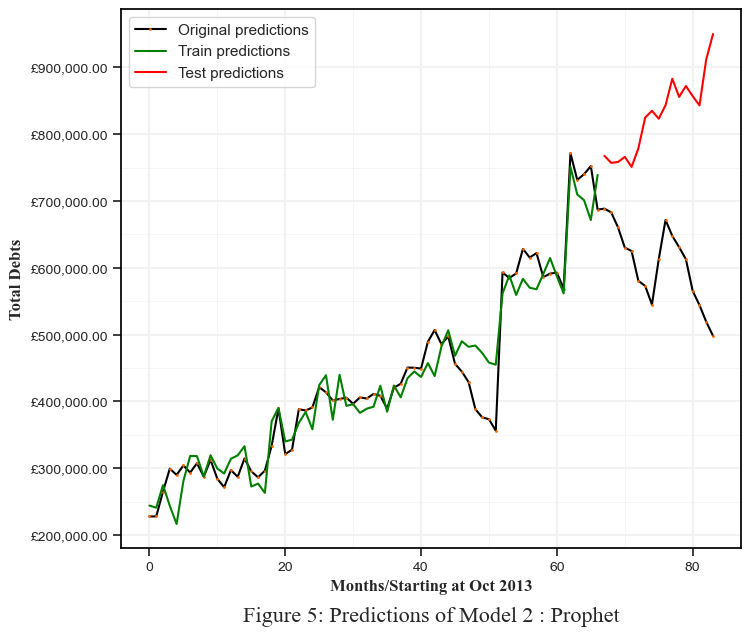

In [28]:
# Set figure and subplots for grids (both Major and minor)
fig, ax = plt.subplots(1, 1)

# Styling for background and figure size
sns.set(rc={'figure.figsize': (8, 7), 'axes.facecolor': 'white', 'xtick.bottom': True, 'ytick.left': True, 'axes.edgecolor': 'black'})

sns.lineplot(data=data, x=data.index, y="Total Debts",color = 'black', marker='o', markeredgewidth=0, markerfacecolor='#FF6600', markersize= 2, label = "Original predictions")
sns.lineplot(data=train_predictions_prp['yhat'], x=range(0,percent_80), y = train_predictions_prp['yhat'],color = 'green', label =  "Train predictions")
sns.lineplot(data=test_predictions_prp['yhat'], x=range(percent_80,84), y = test_predictions_prp['yhat'],color = 'red', label =  "Test predictions")


# Set the minor grid lines on the y axis
ax.get_yaxis().set_minor_locator(mpl.ticker.FixedLocator([250000,350000, 450000,550000, 650000, 750000]))
ax.get_xaxis().set_minor_locator(mpl.ticker.FixedLocator([10,30,50,70]))

ax.grid(visible=True, which='minor', color='#F2F2F2', linewidth=0.5)

# Adjust the major grid lines (both x and y) to have a bigger width and be differentiable from minor. 
ax.grid(visible=True, which='major', color='#F2F2F2', linewidth=1.5)

# Reduce x and y tick sizes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Format y-axis labels to display a pound sign and comma separator and upto 2 decimal places
formatter = mpl.ticker.StrMethodFormatter('£{x:,.2f}')
ax.yaxis.set_major_formatter(formatter)

# Make Y axis labels as bold labels and choose the appropriarte font. 
ax.set_xlabel('Months/Starting at Oct 2013', fontdict={'weight': 'bold', 'fontfamily' : "Times New Roman"})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold','fontfamily' : "Times New Roman"})


ax.tick_params(which='minor', length= 0)
ax.legend()

plt.title('Figure 5: Predictions of Model 2 : Prophet', y= -0.15, fontsize = 16, fontfamily = "Times New Roman")
plt.show()

These overall results show that similar predictions were made by the two forecasting models. However, Prophet performs poorly than ES, hence for this dataset ES would be preferred over Prophet. 

####  Part 3.4   Model 3:Ridge Regression

In [29]:
# We import warnings just to ignore some comman things.
import warnings
warnings.filterwarnings('ignore')

ridge_data = pd.DataFrame(data["Total Debts"])
ridge_data["Months since 2019"] = range(0,84)
ridge_data.head()

,Total Debts,Months since 2019
0,228007.01,0
1,227988.31,1
2,265199.00,2
3,299453.00,3
4,290103.00,4


#####  Part 3.4.1 Feature Engineering : Adding one more feature to denote the special dates

We fetch the indexes of those two dates from the model, then put the column value for those indexes as 1, rest everywhere it is 1. This will tell the model to see these as special dates

In [30]:
ridge_data["Special Date"] = 0  # Set all values to 0 initially
ridge_data.loc[[52, 62], "Special Date"] = 1

#####  Part 3.4.2 Model Building and Train test Split

Here we use implement a Ridge regression model, alpha is chosen by test and trail. <br>
For Train test split, we  apply the same logic as before because we are implementing this forecasting as a supervised machine learning solution and hence predicting what will be the debt in a month rather than ahead in time. <br>
Also, we do not perform any cross validation on our data since we are already using ridge regressiopn and alpha would control for any potential overfitting. If we apply cross validation as well, it may underfit. 

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split

train_data_ridge, test_data_ridge = train_test_split(ridge_data, test_size=0.20, random_state= 24)

print("Training data length: ", len(train_data_ridge))
print("Test data length: ", len(test_data_ridge))

Training data length:  67
Test data length:  17


In [32]:
train_data_ridge.loc[:,"Months since 2019":"Special Date"]

,Months since 2019,Special Date
16,16,0
38,38,0
83,83,0
31,31,0
44,44,0
...,...,...
80,80,0
17,17,0
64,64,0
3,3,0


In [33]:
from sklearn.linear_model import Ridge


#  Build and fit the model
rf1_model = Ridge(alpha=0.001)
rf1_model.fit(train_data_ridge.loc[:,"Months since 2019":"Special Date"],train_data_ridge["Total Debts"])

# Predict for train and test and calculate errors

predcited_train_ridge = rf1_model.predict(train_data_ridge.loc[:,"Months since 2019":"Special Date"])
predcited_test_ridge = rf1_model.predict(test_data_ridge.loc[:,"Months since 2019":"Special Date"])

train_mape_ridge = mean_absolute_percentage_error(train_data_ridge["Total Debts"], predcited_train_ridge)
test_mape_ridge = mean_absolute_percentage_error(test_data_ridge["Total Debts"], predcited_test_ridge)

print("Train MAPE: ", round(train_mape_ridge,3))
print("Test MAPE: ", round(test_mape_ridge,3))

Train MAPE:  0.103
Test MAPE:  0.072


This suggests that this is our best performing model and based on the MAPE value we could say that it will prouce a high quality forecast. Let's visualise the results. We will do some preprocessing and then display.  

In [34]:
# Store the predicted values in dataframe
train_data_ridge["Ridge_Predicted_Values"] = predcited_train_ridge
test_data_ridge["Ridge_Predicted_Values"] = predcited_test_ridge

# Concat dataframe to plot the prediction values
rf_prediction_df = pd.concat([train_data_ridge, test_data_ridge])

rf_prediction_df["Ridge_Predicted_Values"] = round(rf_prediction_df["Ridge_Predicted_Values"],2)
rf_prediction_df.sort_index(inplace = True)

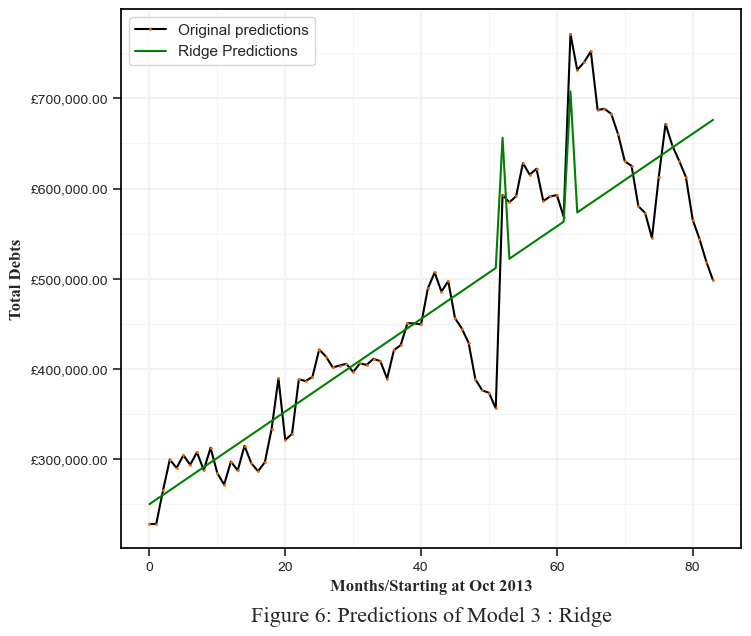

In [35]:
# Set figure and subplots for grids (both Major and minor)
fig, ax = plt.subplots(1, 1)

# Styling for background and figure size
sns.set(rc={'figure.figsize': (8, 7), 'axes.facecolor': 'white', 'xtick.bottom': True, 'ytick.left': True, 'axes.edgecolor': 'black'})

# PLotting the graphs
sns.lineplot(data=rf_prediction_df, x=rf_prediction_df.index, y="Total Debts",color = 'black', marker='o', markeredgewidth=0, markerfacecolor='#FF6600', markersize= 2, label = "Original predictions")
sns.lineplot(data=rf_prediction_df, x=rf_prediction_df.index, y = "Ridge_Predicted_Values",color = 'green', label =  "Ridge Predictions")


# Set the minor grid lines on the y axis
ax.get_yaxis().set_minor_locator(mpl.ticker.FixedLocator([250000,350000, 450000,550000, 650000, 750000]))
ax.get_xaxis().set_minor_locator(mpl.ticker.FixedLocator([10,30,50,70]))

ax.grid(visible=True, which='minor', color='#F2F2F2', linewidth=0.5)

# Adjust the major grid lines (both x and y) to have a bigger width and be differentiable from minor. 
ax.grid(visible=True, which='major', color='#F2F2F2', linewidth=1.5)

# Reduce x and y tick sizes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Format y-axis labels to display a pound sign and comma separator and upto 2 decimal places
formatter = mpl.ticker.StrMethodFormatter('£{x:,.2f}')
ax.yaxis.set_major_formatter(formatter)

# Make Y axis labels as bold labels and choose the appropriarte font. 
ax.set_xlabel('Months/Starting at Oct 2013', fontdict={'weight': 'bold', 'fontfamily' : "Times New Roman"})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold','fontfamily' : "Times New Roman"})


ax.tick_params(which='minor', length= 0)
ax.legend()

plt.title('Figure 6: Predictions of Model 3 : Ridge', y= -0.15, fontsize = 16, fontfamily = "Times New Roman")
plt.show()

In conclusion: Although other methods produce reasonable ouputs, a supervised ML algorithim outperforms the other forecasting models. This was mainly achieved by analysis and incorporating that in features. However, there is a tinge of uncertainity given the limited nature of data. Looking forward supervised machine learning algorithims as well as deep learning algorithims could be very benefical on this dataset, as shown by current results. 